# Milestone 1
`Anugrah Yoga Pratama - Batch 10`
* URL deployment : [Milestone 1 Heroku](https://anugrah-yoga-10-p0m1.herokuapp.com/)

## Objective
`Implementasi Visualisasi Data dan Uji Hipotesis pada Dataset Supermarket Sales.`

## Problem
1. Membuat visualisasi data antara total penjualan dan quantity terhadap product line.
2. Membuat visualisasi box plot data total penjualan terhadap product line.
3. Membuat visualisasi area chart untuk data total penjualan terhadap customer type.
4. Membuat visualisasi persebaran data total penjualan terhadap customer type.
5. Membuat sebuah uji hipotesis dari dataset supermarket sales.

### 1.  Import Pustaka

Import pustaka yang dibutuhkan berupa:
* pandas -- data loading
* numpy -- perhitungan numerik
* scipy -- perhitungan statistik
* matplotlib -- Plotting chart
* seaborn -- Plotting chart
* plotly -- Interactive Plotting Chart

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

### 2. Data Loading

Load **supermarket_sales - Sheet1.csv** data dari local

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### 3. Data Preprocessing

Cek missing value dan tipe data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Kolom **Date** diubah tipe datanya menjadi *datetime*

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

### 4. Explorasi Data

Cek Kolom mana saja yang memiliki *unique values* yang sedikit. Kolom ini dapat memungkinkan untuk dijadikan kategori *groupby* untuk visualisasi atau analisis data

In [5]:
#Cek jumlah data yang unik di setiap kolom
for col_name in df.columns:
    unique_size = df[col_name].unique().size
    if unique_size < 50:
        print(f'{col_name}: {unique_size}')

Branch: 3
City: 3
Customer type: 2
Gender: 2
Product line: 6
Quantity: 10
Payment: 3
gross margin percentage: 1


Overview kembali data berdasarkan tanggal

In [6]:
df.sort_values(by='Date', ascending=True)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,14:43,Ewallet,874.98,4.761905,43.749,6.0
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,20:37,Cash,290.46,4.761905,14.523,6.7
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4


Mengecek bahwa data **Branch** setiap nilainya memiliki pasangan yang sama dengan data **City** yaitu: 
* Branch 'A' = 'Yangon' 
* Branch 'B' = 'Mandalay' 
* Branch 'C' = 'Naypyitaw'

Hal ini dibuktikan dengan ukuran dari penjumlahan query data di bawah ini sama dengan ukuran dari dataframe **df**, sehingga proses analisis data dapat menggunakan kolom branch saja

In [7]:
count_a = df[(df['Branch'] == 'A') & (df['City'] == 'Yangon')]['Branch'].size
count_b = df[(df['Branch'] == 'B') & (df['City'] == 'Mandalay')]['Branch'].size
count_c = df[(df['Branch'] == 'C') & (df['City'] == 'Naypyitaw')]['Branch'].size
count_a + count_b + count_c

1000

Hal yang sama juga berlaku untuk kolom **Tax 5%** dan **gross income**

In [8]:
df[df['Tax 5%'] == df['gross income']]['Tax 5%'].size

1000

Melihat waktu awal dan akhir dari dataframe, dari hasil terlihat bahwa dataset memiliki rentang waktu dari tanggal 01-01-2019 hingga 30-03-2019

In [9]:
df['Date'].min(), df['Date'].max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-03-30 00:00:00'))

### 5. Data Visualization

Visualisasi data disini terbagi menjadi empat bagian yaitu:

* I. Visualisasi Bar Chart dengan Data Quantity dan Total Penjualan terhadap Product Line

Masukan dari visualisasi ini berupa branch/city dan rentang bulan.

In [10]:
#Ada 3 branck yaitu: A-Yangon, B-Mandalay, dan C-Naypyitaw

#Input literals berupa nama branch dan batas waktu dengan tanggal
branch = 'Mandalay'
start_month = 'Januari'
end_month = 'Februari'

#Konversi nama branch menjadi A/B/C
if branch == 'Yangon':
    branch = 'A'
elif branch == 'Mandalay':
    branch = 'B'
else:
    branch = 'C'

#Deklarasi bulan menjadi batas tanggal
date_month = {
    'Januari':'2019-01-01', 
    'Februari':'2019-02-01', 
    'Maret':'2019-03-01', 
    'April':'2019-04-01'
}
#Ubah nama bulan menjadi tanggal
start_month = date_month[start_month]
end_month = date_month[end_month]

Masukan dari branch misalnya adalah 'Mandalay' dan rentang bulan dari Januari hingga Februari

/tmp/ipykernel_73618/4008653084.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_df['Total'] = branch_df['Total'].apply(lambda x: x/100) #Scaling total dibagi dengan 100 agar skala mengecil dan selaras dengan quantity


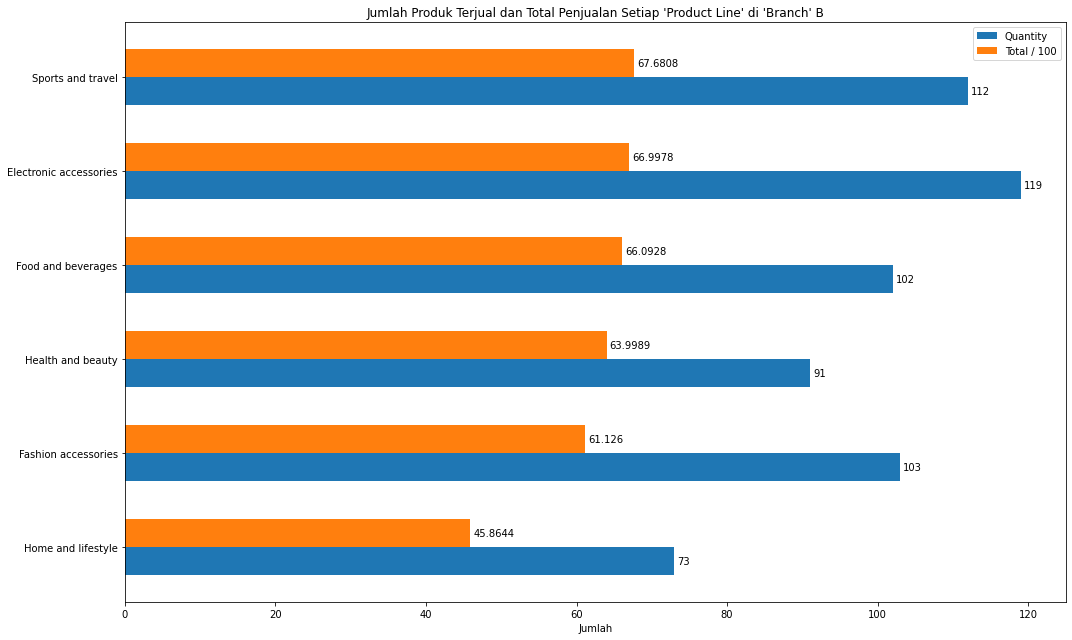

In [11]:
branch_df = df[
    (df['Branch'] == branch) &
    (df['Date'] >= start_month) &
    (df['Date'] < end_month)
] #Definisi dataframe yang nama branchnya dan rentang waktunya sama dengan yang diinputkan

branch_df['Total'] = branch_df['Total'].apply(lambda x: x/100) #Scaling total dibagi dengan 100 agar skala mengecil dan selaras dengan quantity
branch_df = branch_df.groupby('Product line')[['Quantity', 'Total']].sum().sort_values(by='Total') ##Dikelompokkan dengan product line, quantity dan total dijumlah pada setiap product line

labels = branch_df.index.to_list() #Konversi nama2  index product line ke list
quantity_sum = branch_df['Quantity'].to_list() #Ubah series Quantity ke list
total_sum = branch_df['Total'].to_list() #Ubah series Total ke list

y = np.arange(len(labels))  #Urutan okasi label
width = 0.3  #Lebar bar chart

fig, ax = plt.subplots(figsize=(15, 9))
rects1 = ax.barh(y - width/2, quantity_sum, width, label='Quantity') #buat bar quantity di bagian atas
rects2 = ax.barh(y + width/2, total_sum, width, label='Total / 100') #buat bar total/100 di bagian atas

#Menambahkan teks label, judul, dan custom sumbu x ticks
ax.set_xlabel('Jumlah')
ax.set_title(f'Jumlah Produk Terjual dan Total Penjualan Setiap \'Product Line\' di \'Branch\' {branch}')
ax.set_yticks(y, labels)
ax.legend()

#Menampilkan skala
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Grafik bar di atas memperlihatkan besar nilai quantity dan total yang sudah dibagi 100. Grafik diurutkan berdasarkan total penjualan secara descending. Input data yang dapat diubah adalah nama branch dan rentang tanggal.

* II. Visualisasi Box Plot Distribusi Data Total Penjualan terhadap Product Line

Masukan data berupa gender 'male' atau 'female' dan memperlihatkan chart box plot yang menggambarkan persebaran data total penjualan tiap product type.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


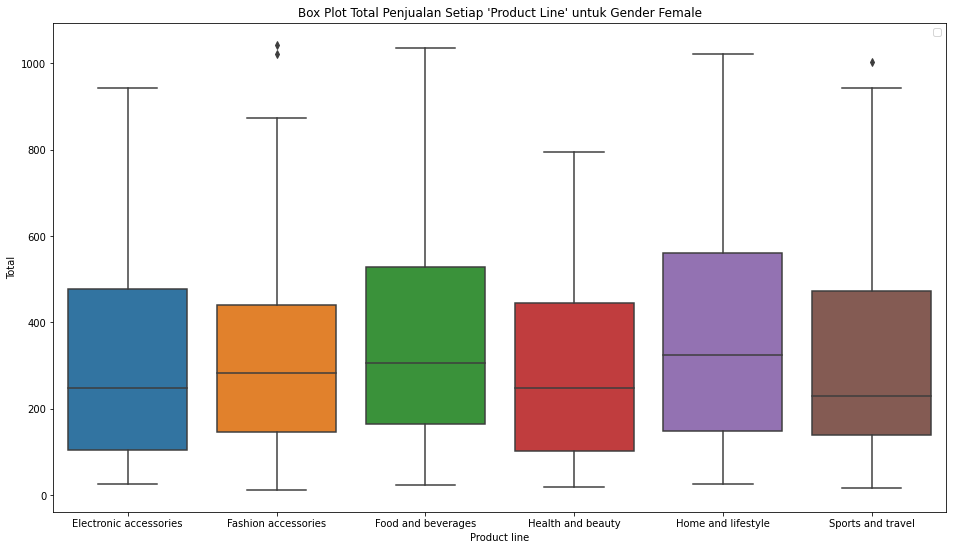

In [12]:
#Gender input: Male atau Female
gender = 'Female'
#Deklarasi dataframe dimana nilai gender sama dengan yang ditentukan
gender_df = df[df['Gender'] == gender]

product_gender = gender_df.sort_values(by='Product line')
fig, ax = plt.subplots(figsize=(16, 9))
ax = sns.boxplot(x=product_gender['Product line'], y=product_gender['Total'], data=product_gender)
ax.set_title(f'Box Plot Total Penjualan Setiap \'Product Line\' untuk Gender {gender.capitalize()}')
ax.legend()

Masukan dari grafik tersebut misalnya adalah female. Berdasarkan grafik box plot di atas terlihat bahwa gender female lebih sedikit berbelanja tipe produk 'sports and travel' dan banyak berbelanja 'Home and lifestyle'

* III. Visualisasi Area Chart dengan Total Penjualan terhadap Customer Type

Grafik area yang digambarkan menggunakan data total penjualan untuk masing-masing tipe customer dan menerima masukan berupa tanggal awal dan akhir yang dapat ditentukan.

<AxesSubplot:title={'center':"Pergerakan Total Penjualan tiap 'Customer Type' untuk rentang tanggal 2019-01-15 hingga 2019-03-25"}, xlabel='Date', ylabel='Total Revenue'>

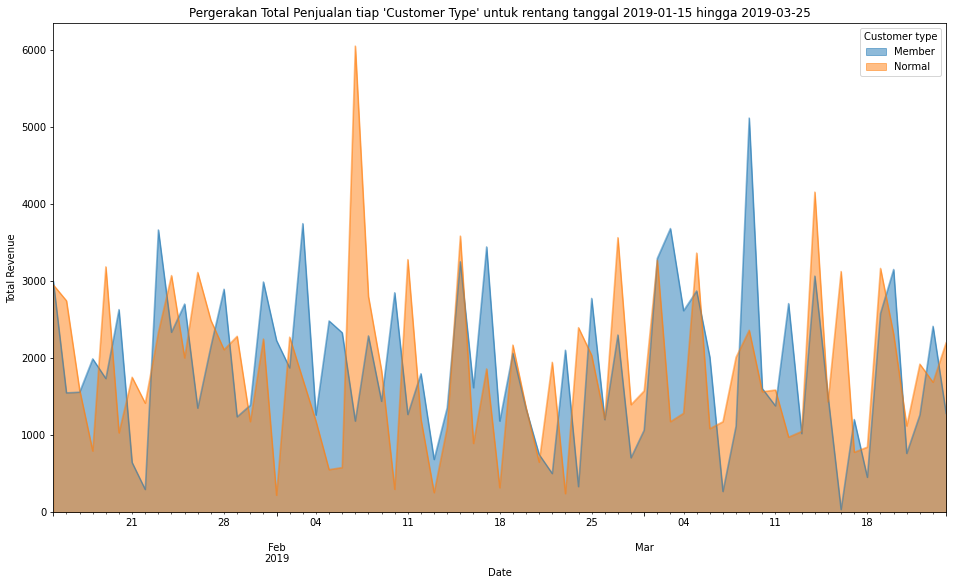

In [13]:
start_date = '2019-01-15'
end_date =  '2019-03-25'

daterange_df = df[(df['Date'] >= start_date) & (df['Date'] < end_date)]
datebranch_df = daterange_df.groupby(['Date', 'Customer type'])[['Customer type', 'Total']].sum() #dengan index Date dan Customer type
datebranch_df = datebranch_df.unstack() #Unstack agar posisi index Customer type bertukar menjadi kolom
datebranch_df['Total'].plot.area(
    stacked=False, 
    title=f'Pergerakan Total Penjualan tiap \'Customer Type\' untuk rentang tanggal {start_date} hingga {end_date}',
    ylabel='Total Revenue',
    figsize=(16, 9)
)

Grafik area di atas menunjukkan bahwa customer 'member' berbelanja lebih daripada customer normal. Hal ini sejalan dengan nilai rata-rata total penjualan untuk customer member dan normal.

In [14]:
daterange_df.groupby('Customer type')['Total'].mean()

Customer type
Member    331.949025
Normal    317.647585
Name: Total, dtype: float64

* IV. Visualisasi Histogram Chart untuk Sebaran Total Penjualan terhadap Customer Type

Grafik histogram ini menerima masukan berupa 'payment' dan menampilkan distribusi total penjualan untuk masing-masing tipe customer

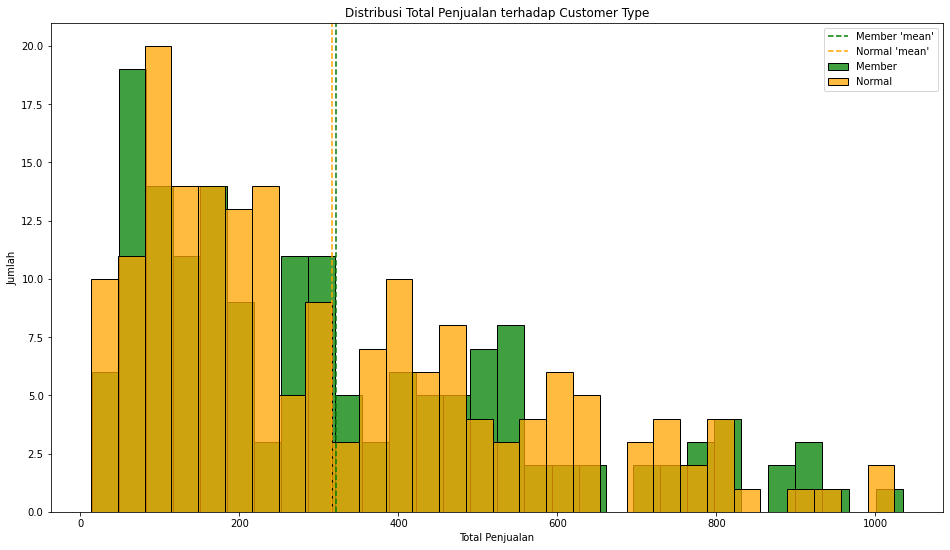

In [15]:
payment = 'Ewallet'
member_payment = df[(df['Payment']==payment) & (df['Customer type'] == 'Member')]
normal_payment = df[(df['Payment']==payment) & (df['Customer type'] == 'Normal')]

fig, ax = plt.subplots(figsize=(16, 9))
ax = sns.histplot(member_payment['Total'], color='green', bins=30)
ax = sns.histplot(normal_payment['Total'], color='orange', bins=30)
ax.set_xlabel('Total Penjualan')
ax.set_ylabel('Jumlah')
ax.set_title(f'Distribusi Total Penjualan terhadap Customer Type')
ax.axvline(member_payment['Total'].mean(), color='green', linestyle='dashed', linewidth=1.5, label='Member \'mean\'')
ax.axvline(normal_payment['Total'].mean(), color='orange', linestyle='dashed', linewidth=1.5, label='Normal \'mean\'')
ax.legend(['Member \'mean\'', 'Normal \'mean\'', 'Member', 'Normal'])

### 6. Hypothesis Testing

Uji hipotesis disini untuk melakukan penguatan suatu pernyataan dari data sampel yang ada. Data 'supermarket sales' diasumsikan sebagi sampel dan data di ambil menjadi 3 bagian yaitu data bulan Januari, data bulan Februari, dan data bulan Maret. 

In [16]:
#pengelompokkan data berdasarkan bulan
bulan1 = df[
    (df['Date'] >= '2019-01-01') &
    (df['Date'] < '2019-02-01') 
    ]

bulan2 = df[
    (df['Date'] >= '2019-02-01') &
    (df['Date'] < '2019-03-01') 
    ]

bulan3 = df[
    (df['Date'] >= '2019-03-01') &
    (df['Date'] < '2019-04-01') 
]


Ingin dilihat bagaimana rata-rata total penjualan di bulan Januari, Februari, dan Maret.

In [17]:
#print nilai mean dan standar deviasi
print(f"Nilai mean dan standard deviation\n\
Bulan 1 : {bulan1['Total'].mean():.2f} dan {bulan1['Total'].std():.2f} \n\
Bulan 2 : {bulan2['Total'].mean():.2f} dan {bulan2['Total'].std():.2f} \n\
Bulan 3 : {bulan3['Total'].mean():.2f} dan {bulan3['Total'].std():.2f} \n\
")

Nilai mean dan standard deviation
Bulan 1 : 330.37 dan 247.38 
Bulan 2 : 320.86 dan 244.48 
Bulan 3 : 317.26 dan 246.11 



Dari hasil rata-rata terlihat bahwa rata-rata total penjualan untuk bulan Januari, Februari, Maret relatif sama dan tidak berbeda jauh. Namun untuk lebih meyakinkan data tersebut dilakukan uji hipotesis diantara ketiga data. Uji hipotesis ini menggunakan ANOVA untuk membandingkan rata-rata total penjualan antara ketiga data. 

* Hipotesis: 
Hipotesis null ($H_0$) menyatakan bahwa rata-rata total penjualan untuk bulan Januari, Februari, dan Maret adalah sama. Hipotesis alternatif ($H_1$) menyatakan bahwa rata-rata total penjualan untuk bulan Januari, Februari, dan Maret ada yang berbeda.
$$H_{0} : \mu_{total-1} = \mu_{total-2} = \mu_{total-3}$$
$$H_{1} : \text{setidaknya ada satu pasang mean berbeda dari yang lainnya}$$

Uji hipotesis ini menggunakan tiga sampel dan memiliki syarat *significant level* $α = 5 \% $ atau *confidence interval* $ 95 \%$. Ini artinya hipotesis $H_o$ gagak ditolak (dapat dipertahankan) jika *probability level* ($p_{value}$) lebih besar daripada *significant level* dan $H_o$ ditolak jika $p_{value}$ lebih kecil daripada *significant level*.

In [18]:
#Hitung p_value menggunakan ANOVA
f_stat, p_total = stats.f_oneway(bulan1['Total'], bulan2['Total'], bulan3['Total'])
print('P-value:','%.3f' % p_total)
print(f_stat)

P-value: 0.769
0.26336478725984996


Dari hasil uji hipotesis ANOVA tiga sampel di atas menghasilkan nilai $p_{value}$ di atas *significant level* $(p_{value} > α)$. Ini artinya hipotesis $H_o$ **gagal ditolak** dan dapat dipertahankan yaitu rata-rata 'total penjualan*' di bulan Januari, Februari, dan Maret adalah sama $\left ( \mu_{total-1} = \mu_{total-2} = \mu_{total-3} \right )$.

Berikut adalah **simulasi** sebaran data antara ketiga sampel dengan menggunakan distribusi normal

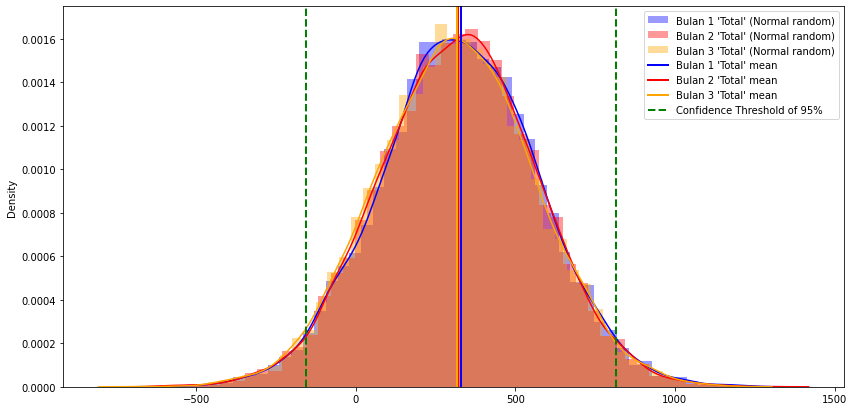

In [20]:
#Membuat data random berdistribusi normal sesuai mean dan std
bulan1_pop = np.random.normal(bulan1['Total'].mean(), bulan1['Total'].std(),10000)
bulan2_pop = np.random.normal(bulan2['Total'].mean(), bulan2['Total'].std(),10000)
bulan3_pop = np.random.normal(bulan3['Total'].mean(), bulan3['Total'].std(),10000)

#Hitung nilai z dengan confidence interval 95%
z_score = stats.norm.interval(0.95, bulan1['Total'].mean(), bulan1['Total'].std())

#Gambar grafik
plt.figure(figsize=(14,7))
sns.distplot(bulan1_pop, label='Bulan 1 \'Total\' (Normal random)',color='blue')
sns.distplot(bulan2_pop, label='Bulan 2 \'Total\' (Normal random)',color='red')
sns.distplot(bulan3_pop, label='Bulan 3 \'Total\' (Normal random)',color='orange')

#membuat garis vertikal rata-rata tiap data
plt.axvline(bulan1['Total'].mean(), color='blue', linewidth=2, label='Bulan 1 \'Total\' mean')
plt.axvline(bulan2['Total'].mean(), color='red',  linewidth=2, label='Bulan 2 \'Total\' mean')
plt.axvline(bulan3['Total'].mean(), color='orange',  linewidth=2, label='Bulan 3 \'Total\' mean')

#membuat garis vertikal confidence interval
plt.axvline(z_score[1], color='green', linestyle='dashed', linewidth=2, label='Confidence Threshold of 95%')
plt.axvline(z_score[0], color='green', linestyle='dashed', linewidth=2)

plt.legend()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Conclusion, Assumption, Overall Analysis

Berdasarkan hasil uji hipotesis ANOVA untuk rata-rata total penjualan di bulan Januari, Februari, dan Maret dengan *significant level* 5% menghasilkan $(p_{value} > α)$ yang berarti hipotesis null $H_{0}$ **gagal ditolak** dan dapat dipertahankan yaitu rata-rata total penjualan di bulan Januari, Februari, dan Maret adalah sama.